# 1 Introducción

Este proyecto analiza las licitaciones públicas realizadas en A Coruña, con el objetivo de entender cómo se gestionan los presupuestos y las adjudicaciones. A través de un estudio detallado, se busca identificar patrones en los contratos, como diferencias entre el presupuesto inicial y el importe adjudicado, la frecuencia de ciertos procedimientos de contratación y la concentración de adjudicaciones en determinadas empresas. Además, se examina el impacto de las tramitaciones urgentes en los costos y la participación de licitadores.

# 2. Objetivo del Proyecto
El análisis permite responder preguntas clave, como si los contratos suelen adjudicarse por debajo del presupuesto, qué empresas concentran más adjudicaciones y cómo influyen los procedimientos en los resultados. Esto ayuda a evaluar la transparencia y eficiencia en el uso de los recursos públicos.

---

# Índice

1. **Introducción**
2. **Objetivo del Proyecto**
3. **Pre-Analisis del Dataset**
4. **Limpieza**
   - Limpieza de datos
   - Selección de información clave
5. **Análisis Económico**
   - Comparación entre presupuesto base y adjudicación
   - Contratos más caros
   - Distribución de valores adjudicados
   - Ratio valor estimado/presupuesto base
   - Comparacion de presupuesto y valor estimado
6. **Análisis de Procesos**
   - Procedimientos más utilizados
   - Estados de las licitaciones
   - Tramitaciones urgentes y su impacto
   - Nº adjudicaciones directas
7. **Análisis de Participación**
   - Promedio de licitadores
   - Relación entre licitadores e importe adjudicado
8. **Características Atípicas**
   - Contratos con un solo licitador
   - Grandes diferencias entre presupuesto y adjudicación
   - Empresas con múltiples adjudicaciones
   - Contratos urgentes con alto valor
   - Promedio del importe según el tipo de tramitación
9. **Conclusión**

In [ ]:
# %conda install -y pandas
# %conda install -c conda-forge -y seaborn matplotlib

In [ ]:
# Charts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and display
from IPython.display import display


In [ ]:
file_path = "licitaciones_coruna.csv"
df_licitaciones = pd.read_csv(file_path, delimiter=",", encoding="utf-8")
df = df_licitaciones.copy()

# 3 - Pre-Analisis del dataset

In [4]:
df.isnull().sum()

expediente                                        0
id_de_publicacion_en_ted                        747
organo_de_contratacion                            0
id_del_organo_de_contratacion                     0
estado_de_la_licitacion                           0
objeto_del_contrato                               0
financiacion_ue                                 297
presupuesto_base_de_licitacion_sin_impuestos      0
valor_estimado_del_contrato                       0
tipo_de_contrato                                  0
codigo_cpv                                        2
lugar_de_ejecucion                                0
sistema_de_contratacion                         157
procedimiento_de_contratacion                     0
tipo_de_tramitacion                               0
metodo_de_presentacion_de_la_oferta               0
fecha_fin_de_presentacion_de_oferta             517
resultado                                         0
adjudicatario                                     0
no_de_licita

Podemos notar una cantidad alta de valores nulos en la tabla, sobre todo en algunos campos que consideramos poco relevantes como son id_de publicacion en ted, fecha fin de presentacion, lote / descripcion y fecha fin de presentacion de solicitud y de ofera. El unico dato que nos puede interesar es lote/descripcion, aunque haya pocos valores lo guardaremos y pasaremos los nan a "sin descripcion". 

Ahora pasaremos a visualizar las valores unicos que hay en cada una  de la columnas

In [104]:
for col in df.columns:
    print(f'\nColumna: {col}')
    print(df[col].value_counts())


Columna: expediente
expediente
231/2022/231    42
238_2025_37      1
211_2020_73      1
000_2020_5       1
100_2018_24      1
                ..
236_2018_209     1
106_2018_228     1
231_2019_32      1
521_2018_528     1
851_2021_62      1
Name: count, Length: 733, dtype: int64

Columna: id_de_publicacion_en_ted
id_de_publicacion_en_ted
c1c6f9a9-0d8f-4011-866a-72a6cd9a3fa0    1
5d836743-437f-4e20-a1c4-1f3747ce3326    1
70d0e32a-e6a3-4ce8-bf8f-d370bf893c3a    1
85b8f381-4ab8-4094-b80c-b643cde267b1    1
fe5da718-753d-43da-9a82-e66c45a0f4c3    1
df30cc4f-f90b-492c-ab25-5425c93e6ea3    1
a05f4320-b8ab-4b5c-99dd-708df0995405    1
3fec317b-7bb2-4909-9ac3-e5602b889e74    1
79be2da1-86b0-480a-8f61-bbeb705e1572    1
ceb9cb4e-96f8-4577-bb69-2c9b3aa95587    1
e43010c3-6def-4895-b897-1df04d16ac3e    1
92288952-4364-42af-8bcf-daa99fd00f27    1
d48ef86b-52b1-4fe0-b2d8-e615c89e2d37    1
3896ca4a-0a3e-4f83-a09b-6a2b1640422e    1
cf20b5ce-0d17-41ea-a210-7f079c2999dd    1
f5b43c3a-fc4f-4924-992b-67402e

# 4. Limpieza de datos

In [ ]:
columns_to_keep = [
    "expediente", 
    "organo_de_contratacion", 
    "estado_de_la_licitacion", 
    "objeto_del_contrato",
    "financiacion_ue", 
    "presupuesto_base_de_licitacion_sin_impuestos", 
    "valor_estimado_del_contrato",
    "tipo_de_contrato", 
    "codigo_cpv",
    "lugar_de_ejecucion",
    "sistema_de_contratacion",
    "procedimiento_de_contratacion",
    "tipo_de_tramitacion",
    "metodo_de_presentacion_de_la_oferta",
    "resultado",
    "adjudicatario", 
    "no_de_licitadores_presentados",
    "importe_de_adjudicacion", 
    "lote___descripcion", 
]

# Filtrar el DataFrame para mantener solo las columnas relevantes
df = df[columns_to_keep]
# Remplazamos las filas vacias por sin descripcion
df["lote___descripcion"] = df["lote___descripcion"].fillna("sin descripcion")

In [45]:
df.head()

,expediente,organo_de_contratacion,estado_de_la_licitacion,objeto_del_contrato,financiacion_ue,presupuesto_base_de_licitacion_sin_impuestos,valor_estimado_del_contrato,tipo_de_contrato,codigo_cpv,lugar_de_ejecucion,sistema_de_contratacion,procedimiento_de_contratacion,tipo_de_tramitacion,metodo_de_presentacion_de_la_oferta,resultado,adjudicatario,no_de_licitadores_presentados,importe_de_adjudicacion,lote___descripcion
0,238_2025_37,junta de gobierno del ayuntamiento de a coruna,adjudicada,servicio de campamento urbano juvenil para el ...,no hay financiacion con fondos de la ue,19906.33,19906.33,servicios,"92000000-servicios de esparcimiento, culturale...",espana - a coruna,no aplica,abierto simplificado,ordinaria,electronica,adjudicado,oscar ramon freire gago,4,16300.00,sin descripcion
1,10c_2024_49,junta de gobierno del ayuntamiento de a coruna,adjudicada,"servicio de salvamento, socorrismo, vigilancia...",no hay financiacion con fondos de la ue,511743.75,1023487.50,servicios,"75241000-servicios de seguridad publica., 6372...",espana - a coruna,no aplica,abierto,ordinaria,electronica,adjudicado,top rescue sl,2,511743.75,sin descripcion
2,211_2025_101,junta de gobierno del ayuntamiento de a coruna,resuelta,servicio de organizacion del campeonato de esp...,no hay financiacion con fondos de la ue,148769.68,192419.68,servicios,92622000-servicios de organizacion de espectac...,espana - a coruna,no aplica,negociado sin publicidad,ordinaria,electronica,formalizado,federacion espanola de triatlon,1,148769.68,sin descripcion
3,105_2024_8420,junta de gobierno del ayuntamiento de a coruna,adjudicada,servicio de vigilancia del centro de atencion ...,no hay financiacion con fondos de la ue,228955.56,457911.12,servicios,"79710000-servicios de seguridad., 79714000-ser...",espana - a coruna,no aplica,abierto,ordinaria,electronica,adjudicado,"homeland security spain vigilancia, proteccion...",2,217308.41,sin descripcion
4,231/2022/231,junta de gobierno del ayuntamiento de a coruna,adjudicada,acuerdo marco de suministro de fondos bibliogr...,no hay financiacion con fondos de la ue,4038.84,4038.84,suministros,22113000-libros para biblioteca.,espana - a coruna,contrato basado en un acuerdo marco,abierto,ordinaria,electronica,adjudicado,"libros para sonar, s.l.u.",3,4038.84,7 - adquisicion libro adulto y juvenil bibliot...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   expediente                                    774 non-null    object 
 1   organo_de_contratacion                        774 non-null    object 
 2   estado_de_la_licitacion                       774 non-null    object 
 3   objeto_del_contrato                           774 non-null    object 
 4   financiacion_ue                               477 non-null    object 
 5   presupuesto_base_de_licitacion_sin_impuestos  774 non-null    float64
 6   valor_estimado_del_contrato                   774 non-null    float64
 7   tipo_de_contrato                              774 non-null    object 
 8   codigo_cpv                                    772 non-null    object 
 9   lugar_de_ejecucion                            774 non-null    obj

## 5. Análisis Económico

En esta sección se examinan los aspectos económicos de las licitaciones públicas, con el objetivo de identificar patrones en los presupuestos y los valores adjudicados. Los puntos clave analizados son los siguientes:

### 5.1 Comparación entre presupuesto y adjudicación
Se analiza la diferencia entre el presupuesto base y el importe adjudicado para determinar si los contratos suelen adjudicarse por debajo del presupuesto inicial.

### 5.2 Contratos más caros
Se identifican los 5-10 contratos con mayor presupuesto base, destacando aquellos de mayor impacto económico.

### 5.3 Distribución de valores adjudicados
Se calculan estadísticas descriptivas como la media, mediana y desviación estándar de los importes adjudicados para entender la distribución de los valores.

### 5.4 Ratio valor estimado/presupuesto base
Se examina si existen contratos donde el valor estimado es significativamente mayor que el presupuesto base, lo que podría indicar sobreestimaciones.

### 5.5 Comparación entre presupuesto base y valor estimado
Se realiza una comparación entre el presupuesto base y el valor estimado para identificar posibles discrepancias o patrones en la planificación económica.


- Media de la diferencia (adjudicación - presupuesto): 73,252.58 €
- Mediana de la diferencia: 3,987.04 €
- % de contratos adjudicados por encima del presupuesto: 0.39%


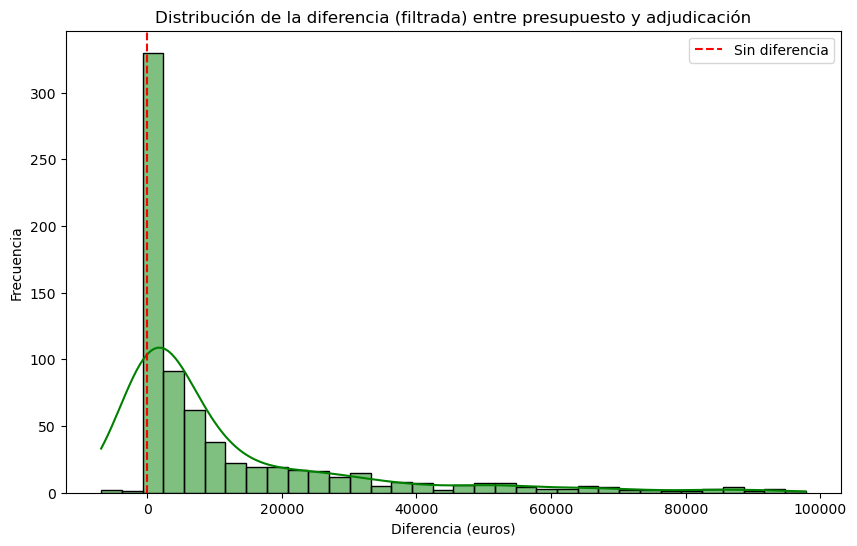

In [102]:
# Calcula diferencia y ratio
df["diferencia"] =  df["presupuesto_base_de_licitacion_sin_impuestos"] - df["importe_de_adjudicacion"]
df["ratio_estimado_presupuesto"] = df["valor_estimado_del_contrato"] / df["presupuesto_base_de_licitacion_sin_impuestos"]

# 1. Comparación presupuesto vs adjudicación
media_dif = df["diferencia"].mean()
mediana_dif = df["diferencia"].median()
porc_por_debajo = (df["diferencia"] < 0).mean() * 100

print(f"- Media de la diferencia (adjudicación - presupuesto): {media_dif:,.2f} €")
print(f"- Mediana de la diferencia: {mediana_dif:,.2f} €")
print(f"- % de contratos adjudicados por encima del presupuesto: {porc_por_debajo:.2f}%")

# Histograma de diferencias
diferencia_filtrada = df["diferencia"][df["diferencia"].between(-100000, 100000)]  # Ajusta el rango según tus datos
plt.figure(figsize=(10, 6))
sns.histplot(diferencia_filtrada, kde=True, color="green")
plt.axvline(0, color="red", linestyle="--", label="Sin diferencia")
plt.title("Distribución de la diferencia (filtrada) entre presupuesto y adjudicación")
plt.xlabel("Diferencia (euros)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
# 2. Contratos más caros
top_contratos = df.nlargest(10, "presupuesto_base_de_licitacion_sin_impuestos")
print("\n Top 10 contratos con mayor presupuesto base:")
top_contratos[["expediente", "objeto_del_contrato", "presupuesto_base_de_licitacion_sin_impuestos"]]


 Top 10 contratos con mayor presupuesto base:


,expediente,objeto_del_contrato,presupuesto_base_de_licitacion_sin_impuestos
160,370_2024_104,concierto de una operacion de prestamo a largo...,25856299.04
190,370_2024_26,"concierto de una operacion de prestamo, con pr...",22763291.51
386,6a1_2020_78,contratacion de las obras de finalizacion de l...,11230018.16
85,106_2024_10,ejecucion de las obras comprendidas en el proy...,9323188.21
583,430_2023_5 l7,"servicio seguridad y vigilancia, control acces...",8821927.65
702,525_2022_60,obras descritas en el proyecto basico y de eje...,8601558.55
355,370_2018_60,"contrato de prestamo, con previa apertura de c...",7975450.00
42,521_2024_689,ejecucion de las obras comprendidas en el proy...,6642632.60
36,521_2024_727,"servicio de mantenimiento, conservacion y repa...",6611570.24
264,370_2019_47,"contrato de prestamo, con previa apertura de c...",6505000.00


In [49]:
# 3. Estadísticas de distribución
media = df["importe_de_adjudicacion"].mean()
mediana = df["importe_de_adjudicacion"].median()
std = df["importe_de_adjudicacion"].std()
print("\nEstadísticas de distribución de importes adjudicados:")
print(f"- Media: {media:,.2f} €")
print(f"- Mediana: {mediana:,.2f} €")
print(f"- Desviación estándar: {std:,.2f} €")


Estadísticas de distribución de importes adjudicados:
- Media: 270,263.18 €
- Mediana: 40,850.50 €
- Desviación estándar: 1,260,230.52 €


In [50]:
# 4. Contratos con ratio valor estimado / presupuesto alto
ratios_altos = df[df["ratio_estimado_presupuesto"] > 1.5]
print(f"\nContratos con ratio valor estimado/presupuesto > 1.5: {len(ratios_altos)} encontrados")
ratios_altos[["expediente", "valor_estimado_del_contrato", "presupuesto_base_de_licitacion_sin_impuestos", "ratio_estimado_presupuesto"]].head()



Contratos con ratio valor estimado/presupuesto > 1.5: 324 encontrados


,expediente,valor_estimado_del_contrato,presupuesto_base_de_licitacion_sin_impuestos,ratio_estimado_presupuesto
1,10c_2024_49,1023487.50,511743.75,2.0
3,105_2024_8420,457911.12,228955.56,2.0
5,211_2025_43,240468.48,120234.24,2.0
11,105_2024_8065,1120185.96,560092.98,2.0
14,244_2025_17,90814.17,30271.39,3.0


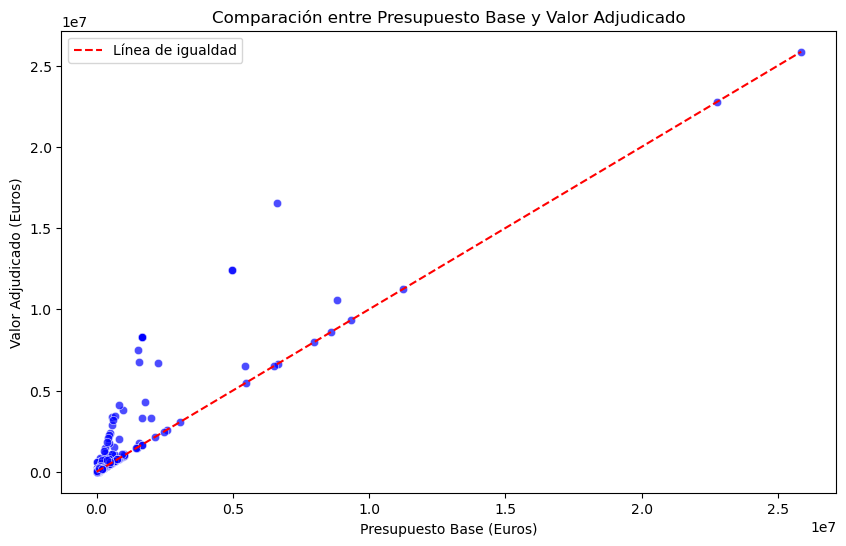

In [96]:
# Gráfico de dispersión: Comparación entre presupuesto base y valor adjudicado con línea de igualdad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="presupuesto_base_de_licitacion_sin_impuestos", y="valor_estimado_del_contrato", alpha=0.7, color="blue")

# Agregar línea de igualdad
min_val = min(df["presupuesto_base_de_licitacion_sin_impuestos"].min(), df["valor_estimado_del_contrato"].min())
max_val = max(df["presupuesto_base_de_licitacion_sin_impuestos"].max(), df["valor_estimado_del_contrato"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea de igualdad")

# Personalización del gráfico
plt.title("Comparación entre Presupuesto Base y Valor Adjudicado")
plt.xlabel("Presupuesto Base (Euros)")
plt.ylabel("Valor Adjudicado (Euros)")
plt.legend()
plt.show()

# 6. Análisis de Procesos

En esta sección se analizan los procesos de contratación utilizados en las licitaciones públicas, con el objetivo de identificar patrones y características relevantes. Se abordan los siguientes puntos:

### 6.1 Procedimientos más comunes
Se analiza la frecuencia de los diferentes tipos de procedimientos de contratación, como abierto, simplificado, entre otros. Esto permite identificar cuáles son los métodos más utilizados en las licitaciones.

### 6.2 Estados de las licitaciones
Se presenta una comparación gráfica de los diferentes estados en los que se encuentran las licitaciones, como adjudicadas, en proceso, desiertas, etc.

### 6.3 Tramitaciones urgentes
Se examina cuántos contratos se tramitan como "urgente" o "emergencia". Además, se incluye una gráfica que muestra la distribución de los valores según el tipo de tramitación.

### 6.4 Adjudicaciones directas
Se identifican los contratos con pocos licitadores (1-2), lo que podría indicar adjudicaciones directas o falta de competencia en el proceso.

In [51]:
# Procedimientos más comunes
procedimientos_comunes = df["procedimiento_de_contratacion"].value_counts()
print("\nProcedimientos más comunes:")
print(procedimientos_comunes)



Procedimientos más comunes:
procedimiento_de_contratacion
abierto simplificado        454
abierto                     252
negociado sin publicidad     65
negociado con publicidad      3
Name: count, dtype: int64


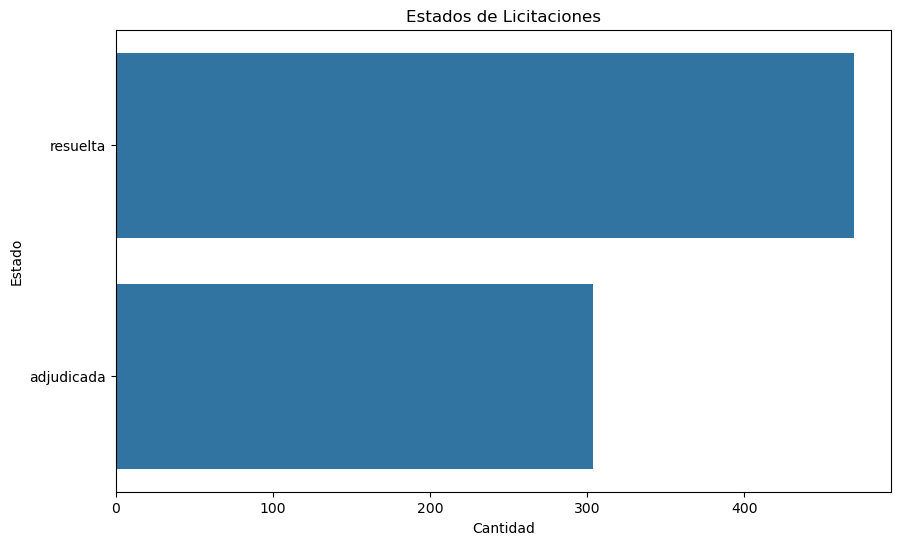

In [97]:
# Estados de licitaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="estado_de_la_licitacion", order=df["estado_de_la_licitacion"].value_counts().index)
plt.title("Estados de Licitaciones")
plt.xlabel("Cantidad")
plt.ylabel("Estado")
plt.show()

In [ ]:
# Tramitaciones urgentes o emergencia
tram_urgente_emergencia = df["tipo_de_tramitacion"].str.lower().isin(["urgente", "emergencia"]).sum()
print(f"\nContratos con tramitación urgente o emergencia: {tram_urgente_emergencia}")

# Contar registros por categoría de tipo de tramitación
conteo_tramitacion = df["tipo_de_tramitacion"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=conteo_tramitacion.index,
    y=conteo_tramitacion.values,
    palette="Set2"
)
plt.title("Cantidad de Registros según el Tipo de Tramitación")
plt.xlabel("Tipo de Tramitación")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son largas
plt.show()


Contratos con tramitación urgente o emergencia: 26


In [53]:
# Adjudicaciones directas (1-2 licitadores)
adjudicaciones_pocas_ofertas = df[df["no_de_licitadores_presentados"].isin([1, 2])].shape[0]
print(f"Contratos adjudicados con 1 o 2 licitadores: {adjudicaciones_pocas_ofertas}")

Contratos adjudicados con 1 o 2 licitadores: 337


## 7. Análisis de Participación

En esta sección se analiza la participación de los licitadores en los procesos de contratación pública, con el objetivo de identificar patrones y relaciones entre el número de participantes y las características de los contratos.

### 7.1 Promedio de licitadores
Se calcula el promedio de licitadores por tipo de contrato y procedimiento de contratación, lo que permite identificar qué tipos de contratos atraen más participación.

### 7.2 Relación entre licitadores e importe adjudicado
Se examina si existe una relación entre el número de licitadores y el importe adjudicado, respondiendo a la pregunta: ¿a mayor importe, más licitadores? Este análisis puede revelar tendencias en la competencia por contratos de mayor valor.

In [58]:
promedio_licitadores = df.groupby(["tipo_de_contrato", "procedimiento_de_contratacion"])["no_de_licitadores_presentados"].mean()
print("\nPromedio de licitadores por tipo de contrato y procedimiento:")
promedio_licitadores


Promedio de licitadores por tipo de contrato y procedimiento:


tipo_de_contrato         procedimiento_de_contratacion
administrativo especial  abierto                          3.500000
concesion de servicios   abierto                          3.000000
obras                    abierto                          8.235294
                         abierto simplificado             7.175439
privado                  abierto                          6.500000
                         abierto simplificado             1.500000
                         negociado con publicidad         5.666667
                         negociado sin publicidad         1.000000
servicios                abierto                          3.715232
                         abierto simplificado             3.746269
                         negociado sin publicidad         1.066667
suministros              abierto                          2.628205
                         abierto simplificado             2.500000
                         negociado sin publicidad         1.000000
Name: n

In [ ]:
# Correlación entre número de licitadores e importe adjudicado
correlacion = df[["no_de_licitadores_presentados", "importe_de_adjudicacion"]].corr().iloc[0, 1]
print(f"\nCorrelación entre número de licitadores e importe adjudicado: {correlacion:.2f}")


Correlación entre número de licitadores e importe adjudicado: 0.10


## 8. Características Atípicas en la Contratación Pública

En esta sección se identifican y analizan características inusuales en los procesos de contratación pública, con el objetivo de detectar posibles irregularidades o patrones que merezcan atención.

### 8.1 Contratos con un solo licitador
Se examinan los contratos adjudicados con un único licitador, ya que podrían indicar adjudicaciones directas encubiertas o falta de competencia en el proceso.

### 8.2 Grandes diferencias entre presupuesto y adjudicación
Se analizan los contratos donde el importe adjudicado es significativamente menor que el presupuesto base, para entender las razones detrás de estas discrepancias.

### 8.3 Empresas con múltiples adjudicaciones
Se identifican las empresas que concentran un alto número de adjudicaciones, lo que podría señalar una falta de diversificación en los adjudicatarios.

### 8.4 Contratos urgentes con alto valor
Se revisan los contratos tramitados como "urgentes" o "de emergencia" con importes elevados, evaluando si la urgencia está justificada.

### 8.5 Promedio del importe según el tipo de tramitación
Se presenta una gráfica que muestra el promedio del importe adjudicado según el tipo de tramitación, para identificar posibles patrones en los costos asociados a cada tipo.

In [ ]:
# 1. Contratos con un solo licitador
solo_un_licitador = df[df["no_de_licitadores_presentados"] == 1]
print(f"\nContratos con un solo licitador: {len(solo_un_licitador)} encontrados")
solo_un_licitador[["expediente", "objeto_del_contrato", "adjudicatario", "importe_de_adjudicacion"]].sort_values(by=["importe_de_adjudicacion"], ascending=False).head()


Contratos con un solo licitador: 210 encontrados


,expediente,objeto_del_contrato,adjudicatario,importe_de_adjudicacion
85,106_2024_10,ejecucion de las obras comprendidas en el proy...,"citanias obras y servicios, s.l.u.",8878472.13
772,a31_2021_93,servicio de comunicaciones del ayuntamiento de...,"telefonica de espana, s a.u.",5441839.93
416,231_2021_1,prestacion de servicios bibliotecarios a la re...,ltm servicios bibliotecarios sl,2235000.00
113,521_2024_500,contrato mixto de servicios y suministros de d...,"iluminaciones ximenez, s.a.u.",1926942.13
641,a31_2022_94,gestion de la infraestructura digital del ayun...,altia consultores s.a.,1788491.17


In [100]:
def format_currency(num):
    """Formatea un número como moneda en euros."""
    return f"{num:,.2f} €".replace(",", "X").replace(".", ",").replace("X", ".")

# mostramos el objeto del contrato de un expediente específico
id_expediente= "231_2021_1"
expediente_especifico = df[df["expediente"] == id_expediente]
print("\nDetalles del expediente "+id_expediente+": ")
#que printee el objeto del contrato completo

print("Objeto del contrato:", expediente_especifico["objeto_del_contrato"].values[0])
print("Importe de adjudicación:", format_currency(expediente_especifico["importe_de_adjudicacion"].values[0]))



Detalles del expediente 231_2021_1: 
Objeto del contrato: prestacion de servicios bibliotecarios a la red de bibliotecas municipales de a coruna
Importe de adjudicación: 2.235.000,00 €


In [101]:
# mostramos el objeto del contrato de un expediente específico
id_expediente= "ad0_2024_160"
expediente_especifico = df[df["expediente"] == id_expediente]
print("\nDetalles del expediente "+id_expediente+": ")
#que printee el objeto del contrato completo

print("Objeto del contrato:", expediente_especifico["objeto_del_contrato"].values[0])
print("Importe de adjudicación:", format_currency(expediente_especifico["importe_de_adjudicacion"].values[0]))
print("Objeto del contrato:", expediente_especifico["tipo_de_contrato"].values[0])



Detalles del expediente ad0_2024_160: 
Objeto del contrato: contratacion de una poliza de seguro colectivo de accidentes para el personal al servicio del excmo. ayuntamiento de a coruna
Importe de adjudicación: 33.089,00 €
Objeto del contrato: servicios


In [ ]:
# 2. Grandes diferencias entre presupuesto y adjudicación
# Definimos gran diferencia arbitrariamente como adjudicación inferior al 60% del presupuesto, quitamos los casos con adjudicación 0
df["porcentaje_adjudicacion_sobre_presupuesto"] = df["importe_de_adjudicacion"] / df["presupuesto_base_de_licitacion_sin_impuestos"]
contratos_validos = df[(df["porcentaje_adjudicacion_sobre_presupuesto"] > 0) & (df["porcentaje_adjudicacion_sobre_presupuesto"] < 0.6)]
print(f"\nContratos adjudicados por menos del 60% del presupuesto: {len(contratos_validos)}")
contratos_validos[["expediente", "presupuesto_base_de_licitacion_sin_impuestos", "importe_de_adjudicacion", "porcentaje_adjudicacion_sobre_presupuesto"]].head()



Contratos adjudicados por menos del 60% del presupuesto: 72


,expediente,presupuesto_base_de_licitacion_sin_impuestos,importe_de_adjudicacion,porcentaje_adjudicacion_sobre_presupuesto
28,a31_2024_96,44927.52,22463.76,0.500000
32,ad0_2024_160,57200.00,33089.00,0.578479
56,gey_2024_130 l2,35079.91,4943.11,0.140910
101,244_2024_89 lote 1,13316.00,5828.00,0.437669
105,211_2024_41,33426.00,18711.87,0.559800


In [91]:
# Filtrar contratos con porcentaje de adjudicación sobre presupuesto mayor que 0 y menor que 0.6
contratos_validos = df[(df["porcentaje_adjudicacion_sobre_presupuesto"] > 0) & (df["porcentaje_adjudicacion_sobre_presupuesto"] < 0.6)]

print(f"\nContratos con porcentaje de adjudicación sobre presupuesto mayor que 0: {len(contratos_validos)}")
contratos_validos[["expediente", "presupuesto_base_de_licitacion_sin_impuestos", "importe_de_adjudicacion", "porcentaje_adjudicacion_sobre_presupuesto"]].head()


Contratos con porcentaje de adjudicación sobre presupuesto mayor que 0: 72


,expediente,presupuesto_base_de_licitacion_sin_impuestos,importe_de_adjudicacion,porcentaje_adjudicacion_sobre_presupuesto
28,a31_2024_96,44927.52,22463.76,0.500000
32,ad0_2024_160,57200.00,33089.00,0.578479
56,gey_2024_130 l2,35079.91,4943.11,0.140910
101,244_2024_89 lote 1,13316.00,5828.00,0.437669
105,211_2024_41,33426.00,18711.87,0.559800


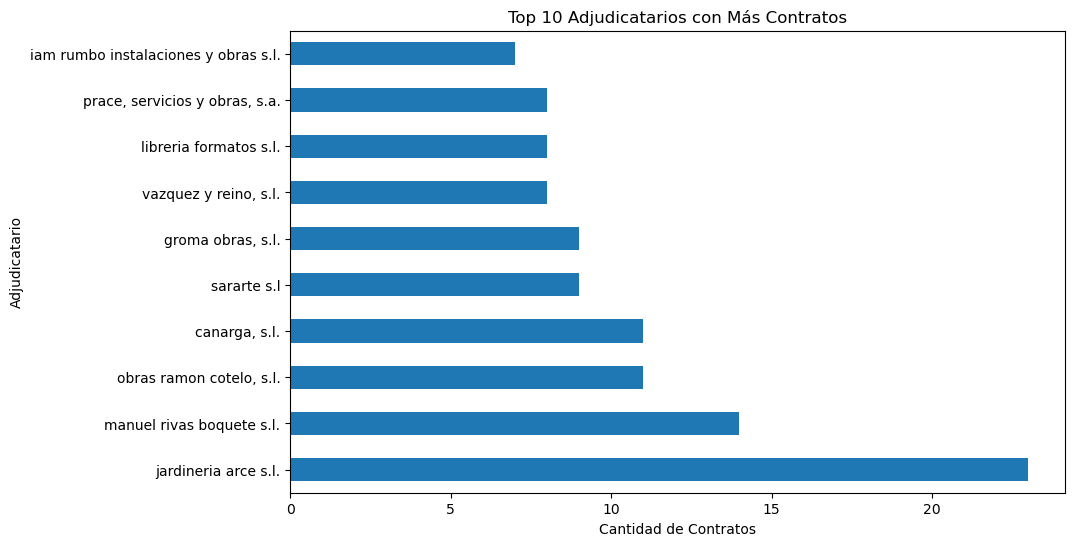

In [99]:
# 3. Empresas con múltiples adjudicaciones / mas frecuentes
plt.figure(figsize=(10, 6))
df["adjudicatario"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Adjudicatarios con Más Contratos")
plt.xlabel("Cantidad de Contratos")
plt.ylabel("Adjudicatario")
plt.show()


In [ ]:
# 4. Contratos urgentes con alto valor (más de 100.000 €)
contratos_urgentes_altos = df[
    (df["tipo_de_tramitacion"].str.lower() == "urgente") &
    (df["importe_de_adjudicacion"] > 100000)
]
print(f"\nContratos urgentes con importe mayor a 100.000 €: {len(contratos_urgentes_altos)}")
contratos_urgentes_altos[["expediente","objeto_del_contrato" ,"importe_de_adjudicacion", "tipo_de_tramitacion"]].head()



Contratos urgentes con importe mayor a 100.000 €: 15


,expediente,objeto_del_contrato,importe_de_adjudicacion,tipo_de_tramitacion
211,10c_2019_102,"servicio de salvamento, socorrismo, vigilancia...",240750.78,urgente
385,541_2020_1574,obras de implantacion de huertas urbanas y edi...,242750.05,urgente
390,541_2020_2277,obras de creacion del bosque de breogan (feans...,161720.59,urgente
391,100_2021_8,prestacion del servicio de desarrollo de servi...,135880.00,urgente
409,521_2020_360,reposicion bajo criterios de sostenibilidad de...,264672.79,urgente


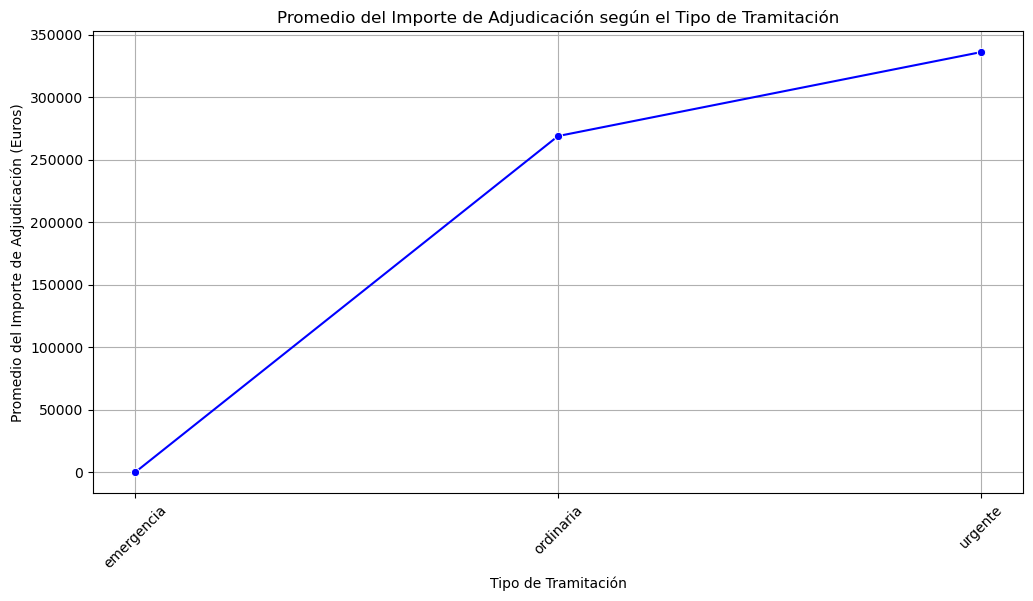

In [ ]:
# Calcular el promedio del importe de adjudicación según el tipo de tramitación
promedio_adjudicacion = df.groupby("tipo_de_tramitacion")["importe_de_adjudicacion"].mean().sort_values()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=promedio_adjudicacion.index,
    y=promedio_adjudicacion.values,
    marker="o", 
    color="blue"
)
plt.title("Promedio del Importe de Adjudicación según el Tipo de Tramitación")
plt.xlabel("Tipo de Tramitación")
plt.ylabel("Promedio del Importe de Adjudicación (Euros)")
plt.xticks(rotation=45)  
plt.grid(True) 
plt.show()

# 9. Conclusión
El análisis de las licitaciones públicas en A Coruña revela que, en la mayoría de los casos (75%), el importe final de adjudicación es significativamente menor que el presupuesto base, mientras que solo en un 0.39% supera dicho presupuesto. Además, se identificaron numerosas concesiones tramitadas como urgentes, aunque al analizar el objeto del contrato, muchas no parecen justificar dicha urgencia. Este tipo de tramitación incrementa el coste promedio en aproximadamente 70,000 euros por licitación.

Por otro lado, se detectaron empresas con una alta concentración de contrataciones públicas, como Jardinería Arce y Manuel Rivas Boquete SL, lo que podría indicar una falta de diversificación en los adjudicatarios. Finalmente, del total de licitaciones válidas, 400 ya han sido resueltas, mientras que 300 permanecen en estado de adjudicación, reflejando un avance significativo en la gestión de los contratos.

